In [9]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import re

In [6]:
# 화면크기 설정
plt.rcParams['figure.figsize'] = (15,13)
# 폰트 설정
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
path = './210806_다음대통령텍스트.xlsx'
df = pd.read_excel(path, index_col=False)

In [5]:
df['텍스트']

0                                                        e
1                                                      테스트
2                                                      테스트
3                                                      결단력
4                                                   공약 지키기
                               ...                        
43254    잘은 모르지만 너무 .무리한 공략하지말고  신냠을 가지고 주변 말들에 좌지우지 하지...
43255                     각기 다른 이익집단이 추구하는 가치들의 균형을 잘 잡는 것
43256                                               비전과 능력
43257                                            정직함  통찰력 
43258                             청렴하고 국민의 소리에 귀를 기울이는 대통령
Name: 텍스트, Length: 43259, dtype: object

In [41]:
# 특수기호 & 영어 & 숫자 제거
# 전체 글자수를 알아보기 위해서 다 붙임
def text_preprocessing(text):
    text = str(text)
    sentence = text.split(' ')
    prepro_sentence = []
    for word in sentence:
        prepro_word = re.sub(r'[^가-힣]', '', word)
        prepro_sentence.append(prepro_word)
    result = ' '.join(prepro_sentence)
    return result

In [24]:
# 글자수 최대,최소,평균, 사분위 분포 확인 함수
def text_len_df(text_len):
    text_df = pd.DataFrame()
    q1 = np.percentile(text_len,25)
    q2 = np.percentile(text_len,50)
    q3 = np.percentile(text_len,75)
    iqr = q3 - q1
    
    text_df['최대'] = [max(text_len)]
    text_df['최소'] = [min(text_len)]
    text_df['평균'] = [text_len.mean()]
    text_df['최저한계치'] = [q1-(1.5*iqr)]
    text_df['제1사분위'] = [q1]
    text_df['제2사분위'] = [q2]
    text_df['제3사분위'] = [q3]
    text_df.index = ['다음 대통령 텍스트 길이']
    
    return text_df

In [25]:
def text_count(text_len):
    text_df = pd.DataFrame()
    q1 = np.percentile(text_len,25)
    q2 = np.percentile(text_len,50)
    q3 = np.percentile(text_len,75)
    iqr = q3 - q1
    
    text_df['총 인원'] = [len(text_len)]
    text_df['평균 이상'] = [len(text_len[text_len>=text_len.mean()])]
    text_df['평균 미만'] = [len(text_len[text_len<text_len.mean()])]
    text_df['1분위'] = [len(text_len[text_len<q1])]
    text_df['2분위'] = [len(text_len[(text_len>=q1) & (text_len<q2)])]
    text_df['3분위'] = [len(text_len[(text_len>=q2) & (text_len<q3)])]
    text_df['4분위'] = [len(text_len[text_len>=q3])]
    text_df.index = ['다음 대통령 텍스트 길이별 분위 인원']
    
    return text_df

In [28]:
def textlen_boxplot(text_len):
    plt.figure(figsize=(3,9))
    plt.boxplot([text_len],
                labels=['텍스트 길이 boxplot'],
               showmeans=True)
    plt.show()
    return None

In [21]:
new_text = pd.DataFrame()
new_text

""


In [22]:
new_text['text'] = df['텍스트'].map(text_preprocessing)
new_text

,text
0,
1,테스트
2,테스트
3,결단력
4,공약지키기
...,...
43254,잘은모르지만너무무리한공략하지말고신냠을가지고주변말들에좌지우지하지않는뚝심있고재치도있으시...
43255,각기다른이익집단이추구하는가치들의균형을잘잡는것
43256,비전과능력
43257,정직함통찰력


In [23]:
new_text['len'] = [len(char) for char in new_text['text'].values]
new_text

,text,len
0,,0
1,테스트,3
2,테스트,3
3,결단력,3
4,공약지키기,5
...,...,...
43254,잘은모르지만너무무리한공략하지말고신냠을가지고주변말들에좌지우지하지않는뚝심있고재치도있으시...,101
43255,각기다른이익집단이추구하는가치들의균형을잘잡는것,24
43256,비전과능력,5
43257,정직함통찰력,6


In [26]:
# 텍스트 길이 분포 확인
text_len_df(new_text['len'])

,최대,최소,평균,최저한계치,제1사분위,제2사분위,제3사분위
다음 대통령 텍스트 길이,1030,0,24.167965,-27.0,6.0,13.0,28.0


In [27]:
text_count(new_text['len'])

,총 인원,평균 이상,평균 미만,1분위,2분위,3분위,4분위
다음 대통령 텍스트 길이별 분위 인원,43259,12628,30631,9534,10965,11633,11127


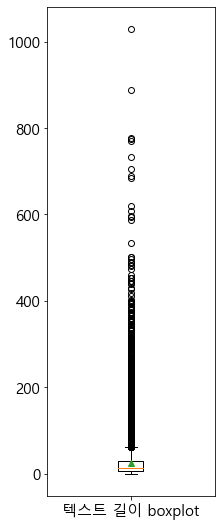

In [29]:
textlen_boxplot(new_text['len'])

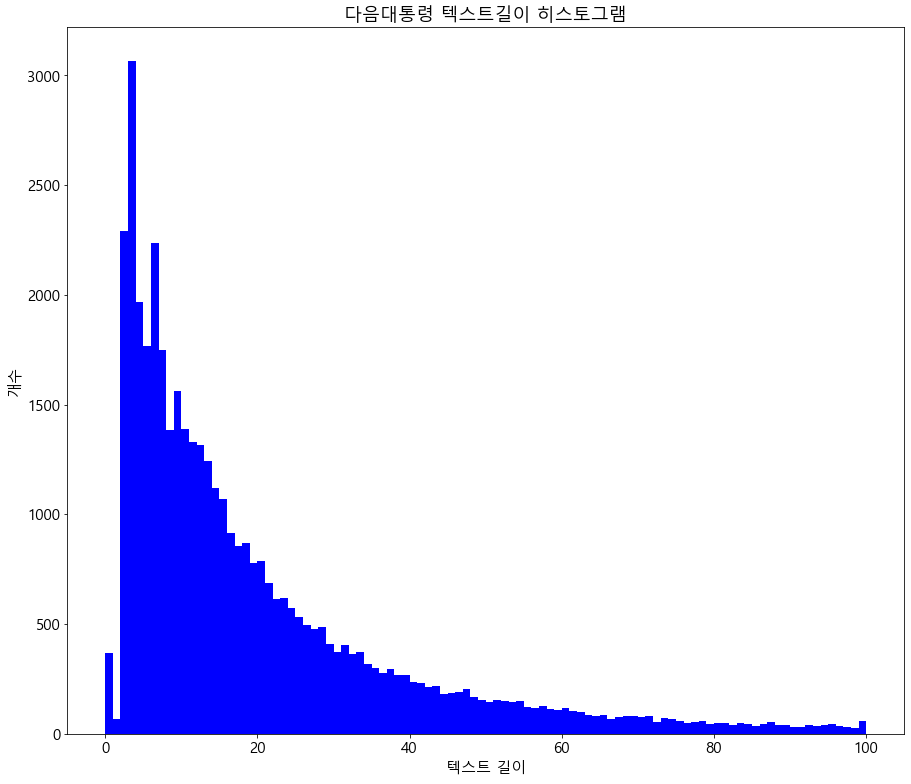

In [38]:
plt.hist(new_text['len'].values, bins=100, range=[0,100], color='b', label='다음 대통령 텍스트')
plt.title('다음대통령 텍스트길이 히스토그램')
plt.xlabel('텍스트 길이')
plt.ylabel('개수')
plt.show()

In [39]:
# 13글자 미만 (단문)
new_text[new_text['len']<13]

,text,len
0,,0
1,테스트,3
2,테스트,3
3,결단력,3
4,공약지키기,5
...,...,...
43250,정치잘하고비리조없에줘요,12
43251,부동산안정화,6
43252,경제관념,4
43256,비전과능력,5


In [40]:
# 13글자 이상 (장문)
new_text[new_text['len']>=13]

,text,len
5,북한에좀물건을안퍼줬으면좋겠다,15
8,분쟁을막고화합하도록하게하는역량,16
16,기본적으로인품이갖추어졌다는가정하에국민의목소리에귀를기울이면서소통하는능력,38
26,국민들의소리를들어주는대통령,14
27,계획의추진력국민의의견듣고과감한결단력,19
...,...,...
43248,추진력있는사람국민과소통할줄아는사람상식이통하는사람무엇이옳고그른지무엇이우선적으로선행되어...,90
43253,리더십편향되지않은평정심명확한목표설정과추진력소통능력협상력,30
43254,잘은모르지만너무무리한공략하지말고신냠을가지고주변말들에좌지우지하지않는뚝심있고재치도있으시...,101
43255,각기다른이익집단이추구하는가치들의균형을잘잡는것,24


In [42]:
# 전체 rawdata
df['전처리_텍스트'] = df['텍스트'].map(text_preprocessing)
df['텍스트 길이'] = new_text['len']
df

,성별,나이,거주지,텍스트,전처리_텍스트,텍스트 길이
0,1,36,1,e,,0
1,2,28,1,테스트,테스트,3
2,1,18,4,테스트,테스트,3
3,2,31,2,결단력,결단력,3
4,2,24,7,공약 지키기,공약 지키기,5
...,...,...,...,...,...,...
43254,2,40,8,잘은 모르지만 너무 .무리한 공략하지말고 신냠을 가지고 주변 말들에 좌지우지 하지...,잘은 모르지만 너무 무리한 공략하지말고 신냠을 가지고 주변 말들에 좌지우지 하지않...,101
43255,2,20,14,각기 다른 이익집단이 추구하는 가치들의 균형을 잘 잡는 것,각기 다른 이익집단이 추구하는 가치들의 균형을 잘 잡는 것,24
43256,1,53,1,비전과 능력,비전과 능력,5
43257,2,24,1,정직함 통찰력,정직함 통찰력,6


In [43]:
# 13글자 미만 (단문)
short_text = df[df['텍스트 길이']<13]
short_text

,성별,나이,거주지,텍스트,전처리_텍스트,텍스트 길이
0,1,36,1,e,,0
1,2,28,1,테스트,테스트,3
2,1,18,4,테스트,테스트,3
3,2,31,2,결단력,결단력,3
4,2,24,7,공약 지키기,공약 지키기,5
...,...,...,...,...,...,...
43250,1,25,12,정치잘하고 비리조없에줘요,정치잘하고 비리조없에줘요,12
43251,2,40,1,부동산 안정화,부동산 안정화,6
43252,1,32,1,경제관념,경제관념,4
43256,1,53,1,비전과 능력,비전과 능력,5


In [44]:
long_text = df[df['텍스트 길이']>=13]
long_text

,성별,나이,거주지,텍스트,전처리_텍스트,텍스트 길이
5,1,28,2,북한에 좀 물건을 안퍼줬으면 좋겠다.,북한에 좀 물건을 안퍼줬으면 좋겠다,15
8,1,24,1,"분쟁을 막고, 화합하도록 하게 하는 역량",분쟁을 막고 화합하도록 하게 하는 역량,16
16,2,36,1,"기본적으로 인품이 갖추어졌다는 가정 하에, 국민의 목소리에 귀를 기울이면서 소통하는 능력",기본적으로 인품이 갖추어졌다는 가정 하에 국민의 목소리에 귀를 기울이면서 소통하는 능력,38
26,2,24,14,국민들의 소리를 들어주는대통령,국민들의 소리를 들어주는대통령,14
27,2,41,12,계획의 추진력. 국민의 의견 듣고 과감한 결단력,계획의 추진력 국민의 의견 듣고 과감한 결단력,19
...,...,...,...,...,...,...
43248,2,33,1,추진력 있는 사람. 국민과 소통할 줄 아는 사람. 상식이 통하는 사람. 무엇이 옳고...,추진력 있는 사람 국민과 소통할 줄 아는 사람 상식이 통하는 사람 무엇이 옳고 그른...,90
43253,1,41,1,리더십 편향되지 않은 평정심 명확한 목표설정과 추진력 소통능력 협상력,리더십 편향되지 않은 평정심 명확한 목표설정과 추진력 소통능력 협상력,30
43254,2,40,8,잘은 모르지만 너무 .무리한 공략하지말고 신냠을 가지고 주변 말들에 좌지우지 하지...,잘은 모르지만 너무 무리한 공략하지말고 신냠을 가지고 주변 말들에 좌지우지 하지않...,101
43255,2,20,14,각기 다른 이익집단이 추구하는 가치들의 균형을 잘 잡는 것,각기 다른 이익집단이 추구하는 가치들의 균형을 잘 잡는 것,24


In [45]:
# 엑셀 각 파일 저장
df.to_excel('./210806_다음대통령텍스트_전체rawdata.xlsx',index='ignore')
short_text.to_excel('./210806_다음대통령텍스트_단문rawdata.xlsx',index='ignore')
long_text.to_excel('./210806_다음대통령텍스트_장문rawdata.xlsx',index='ignore')